In [1]:
import numpy as np
import scipy.stats
import pylab as plt
import astroML.stats

In [2]:
random_state = np.random.RandomState(seed=10)

In [3]:
sunny = 1
cloudy = 0

N = 10000

current = cloudy

In [4]:
def sample(current, N):
    weather = [current]
    
    for i in range(1, N):
        p_acc = random_state.uniform(0, 1)

        if current == sunny:
            if p_acc < 0.9: 
                current = sunny
            else:
                current = cloudy
        elif current == cloudy:
            if p_acc < 0.5: 
                current = sunny
            else:
                current = cloudy

        weather.append(current)

    return np.array(weather)

In [5]:
weather = sample(current,N)
probability = np.mean(weather)
print(probability)

0.839


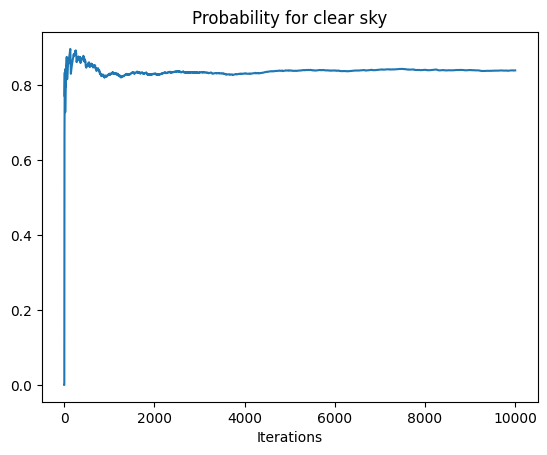

In [6]:
prob_during = np.cumsum(weather)/(np.arange(weather.size)+1)
plt.plot(prob_during)
plt.xlabel('Iterations')
plt.title('Probability for clear sky')
plt.show()

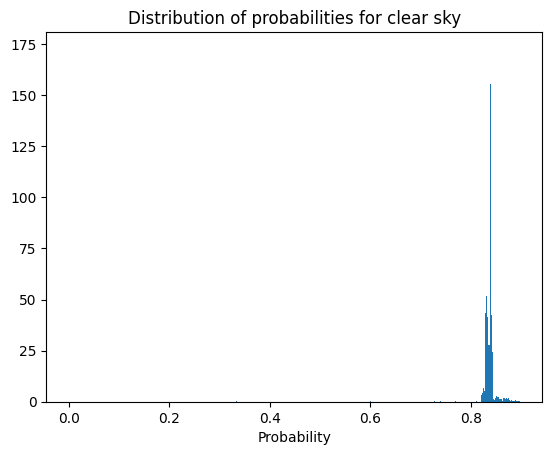

In [7]:
from astropy.visualization.hist import hist

_ = hist(prob_during, bins="freedman",density=True)
plt.xlabel('Probability')
plt.title('Distribution of probabilities for clear sky')
plt.show()

In [8]:
print(np.median(prob_during))
print(astroML.stats.sigmaG(prob_during))

0.8382579279942055
0.005398264916012217


#### Burn-in

Text(0.5, 1.0, 'Distribution of probabilities for clear sky')

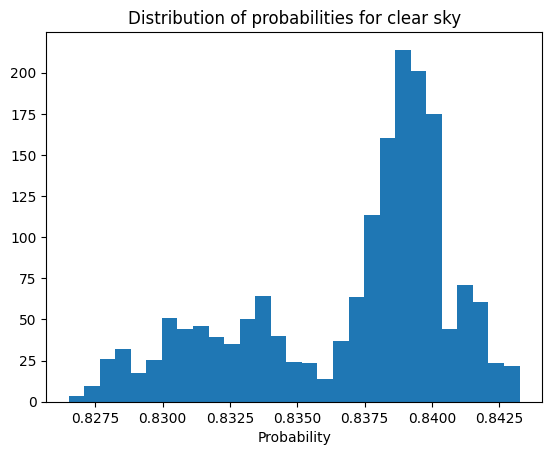

In [9]:
burnin_index=2000
prob_burn = prob_during[burnin_index:]

_ = hist(prob_burn, bins="freedman",density=True)
plt.xlabel('Probability')
plt.title('Distribution of probabilities for clear sky')

In [10]:
print(np.median(prob_burn))
print(astroML.stats.sigmaG(prob_burn))

0.8384952068580387
0.004282875449721581
